In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import time
import json
import openweathermapy.core as owm
from citipy import citipy
from random import uniform

# Google Places API Key from config
from config import key

In [2]:
#collect 500+ cities across the world of varying distance from the equator
#Perform a weather check on each of the cities using a series of successive API calls.
#Include a print log of each city as it's being processed with the city number, city name, and requested URL.
#Get Temp Latitude, humidity,cloudiness, wind speed (mph) from api
#Create scatter plots

In [3]:
#create random list of lat and long
#use citipy to find the nearest city to lat and long
#get api for each city from open weather mapy
city = citipy.nearest_city(0.00, 0.00)
city
city.city_name

'takoradi'

In [27]:
lat=[]
long=[]
city_name=[]
city_counter = 0
temp = []
latitude =[]
humidity =[]
cloudiness = []
wind_speed = []

#cities_pd["temp"] = ""
#creatins a random lat and lon
x, y = uniform(-180,180), uniform(-90, 90)
y

#collect 500+ cities across the world of varying distance from the equator
data_range = np.arange(1,100,1)
data_range

# Create settings dictionary with information we're interested in
settings = {"units": "metric", "appid": key}

#

for data in data_range:
    
    #counting the number of selected cities
    city_counter = city_counter + 1
    #creating random list of lat
    x = uniform(-180,180)
    
    #creaing random list of long
    y = uniform(-90, 90)
    
    #finding nearest city to the random corrdinate
    city = citipy.nearest_city(x, y)
    
    #finding the city name from nearest city from above 
    city_name=city.city_name
    
    lat.append(x)
    long.append(y)
    #city_name.append(city_name)
    
    
    #api for current weather for selected random city
    current_weather = owm.get_current(city_name, **settings)
    
    try:
        current_weather = owm.get_current(city_name, **settings) 
    except HTTPError:
        print("not city data")
        
    #print(current_weather)
    print(str(city_counter) +" " +str(city_name))
    #print(city_counter)
    
    #getting temp,latitute,humdity,cloudiness, wind spped
    temp.append(current_weather["main"]["temp"])
    humidity.append(current_weather["main"]["humidity"])
    cloudiness.append(current_weather["clouds"]["all"])
    wind_speed.append(current_weather["wind"]["speed"])
    latitude.append(current_weather["coord"]["lat"])
    
    #cities_pd.set_value(index,"temp",)
    
    
    #summary = ["name", "main.temp"]
    #data = current_weather(*summary)
    print(data)
    
print(temp)
print(humidity)
print(cloudiness)
print(wind_speed)                                              

1 port elizabeth
1
2 bredasdorp
2
3 ushuaia
3
4 dikson
4
5 ushuaia
5
6 ushuaia
6
7 epe
7
8 bredasdorp
8
9 warah
9
[1.8, 16.75, 6, -21.3, 6, 6, 5.39, 16.75, 7.95]
[55, 100, 75, 89, 75, 75, 100, 100, 62]
[1, 92, 20, 32, 20, 20, 75, 92, 0]
[4.1, 2.51, 2.6, 7.31, 2.6, 2.6, 2.1, 2.51, 0.81]


In [22]:
print(json.dumps(current_weather, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 32
    },
    "cod": 200,
    "coord": {
        "lat": 58.5,
        "lon": 39.12
    },
    "dt": 1520652036,
    "id": 506029,
    "main": {
        "grnd_level": 1015,
        "humidity": 62,
        "pressure": 1015,
        "sea_level": 1036.49,
        "temp": -15.4,
        "temp_max": -15.4,
        "temp_min": -15.4
    },
    "name": "Poshekhonye",
    "sys": {
        "country": "RU",
        "message": 0.0079,
        "sunrise": 1520654053,
        "sunset": 1520694872
    },
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 126.504,
        "speed": 4.56
    }
}


In [23]:
temp_test=current_weather["wind"]["speed"]
temp_test


4.56

In [28]:
# create dataframe with data from all the cities
weather_dict = {
    "Temperature": temp,
    "humidity": humidity,
    "latitude": latitude,
    "cloudiness":cloudiness,
    "wind speed":wind_speed
} 
weather_dict

{'Temperature': [1.8, 16.75, 6, -21.3, 6, 6, 5.39, 16.75, 7.95],
 'cloudiness': [1, 92, 20, 32, 20, 20, 75, 92, 0],
 'humidity': [55, 100, 75, 89, 75, 75, 100, 100, 62],
 'latitude': [39.31,
  -34.53,
  -54.81,
  73.51,
  -54.81,
  -54.81,
  52.18,
  -34.53,
  13.4],
 'wind speed': [4.1, 2.51, 2.6, 7.31, 2.6, 2.6, 2.1, 2.51, 0.81]}

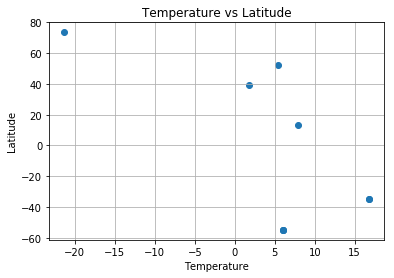

In [30]:
# Build a scatter plot for Temperature vs Latitude 
plt.scatter(weather_dict["Temperature"], weather_dict["latitude"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature vs Latitude")
plt.ylabel("Latitude")
plt.xlabel("Temperature")
plt.grid(True)

# Save the figure
#plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

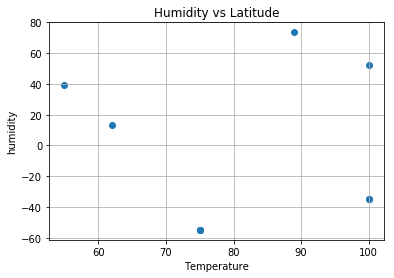

In [31]:
# Build a scatter plot for Humidity vs Latitude 
plt.scatter(weather_dict["humidity"], weather_dict["latitude"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity vs Latitude")
plt.ylabel("Latitude")
plt.xlabel("Humidity")
plt.grid(True)

# Save the figure
#plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

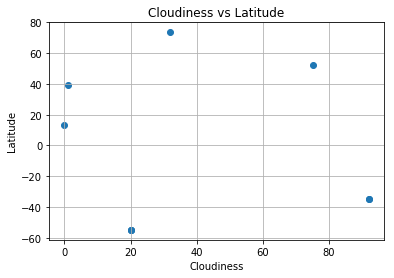

In [33]:
# Build a scatter plot for Cloudiness vs Latitude 
plt.scatter(weather_dict["cloudiness"], weather_dict["latitude"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness vs Latitude")
plt.ylabel("Latitude")
plt.xlabel("Cloudiness")
plt.grid(True)

# Save the figure
#plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

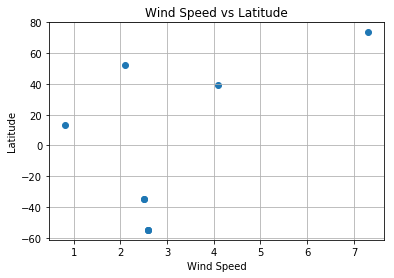

In [35]:
# Build a scatter plot for Cloudiness vs Latitude 
plt.scatter(weather_dict["wind speed"], weather_dict["latitude"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed vs Latitude")
plt.ylabel("Latitude")
plt.xlabel("Wind Speed")
plt.grid(True)

# Save the figure
#plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

In [ ]:
#questions:
#1.How to ensure that I am not getting the same city more than once?
#2.How to print url while using wrapper?